# Visualización de Incendios Forestales

In [81]:
!pip install squarify

In [82]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import geopandas as gpd

In [83]:
# Dataframe
url = 'https://raw.githubusercontent.com/AndrsGzRo/incendios-forestales-mx/refs/heads/main/data-2025-11-05.csv'
df = pd.read_csv(url)

# Primeros cincos renglones
df.head()

,anio,Clave_del_incendio,latitud,longitud,Clave_Municipio,Estado,Municipio,CVE_ENT,CVE_MUN,CVEGEO,...,Entidad,fn_Clave_del_incendio,fn_Predio,fn_Causa,fn_Causa_especifica,fn_Duracion_dias,fn_Tipo_de_incendio,fn_Tipo_Vegetacion,fn_Tipo_impacto,fn_Tamano
0,2015,15-01-0001,21.995503,-102.750478,3.0,Aguascalientes,Calvillo,1,3.0,301,...,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,15-01-0002,21.773878,-102.300881,1.0,Aguascalientes,Aguascalientes,1,1.0,101,...,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,15-01-0003,21.785075,-102.319444,1.0,Aguascalientes,Aguascalientes,1,1.0,101,...,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,15-01-0004,22.224067,-102.336411,7.0,Aguascalientes,Rincón de Romos,1,7.0,701,...,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,15-01-0005,22.041083,-101.973917,2.0,Aguascalientes,Asientos,1,2.0,201,...,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.1 Información de dataframe

In [84]:
def info_df(df):
    print('---------Información general del Dataframe---------')
    print(df.info())
    print('---------Estadísticas del df---------')
    print(df.describe())
    print('---------Valores nulos---------')
    print(df.isnull().sum().sort_values(ascending=False))
    print('---------Valores únicos---------')
    print(df.nunique())

info_df(df)

---------Información general del Dataframe---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71089 entries, 0 to 71088
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anio                   71089 non-null  int64  
 1   Clave_del_incendio     71089 non-null  object 
 2   latitud                71089 non-null  float64
 3   longitud               71089 non-null  float64
 4   Clave_Municipio        71075 non-null  float64
 5   Estado                 71089 non-null  object 
 6   Municipio              71089 non-null  object 
 7   CVE_ENT                71089 non-null  int64  
 8   CVE_MUN                71089 non-null  float64
 9   CVEGEO                 71089 non-null  int64  
 10  Region                 71089 non-null  object 
 11  Predio                 71087 non-null  object 
 12  Causa                  71089 non-null  object 
 13  Causa_especifica       71089 non-null  object 
 14  Fe

## 1.2 Limpieza

Se eliminarán las variables que empiezan con ``` fn_``` ya que suelen ser valores nulos.




In [85]:
# Eliminando columnas fn
df_raw= df.copy()
df_clean= df_raw.loc[:,~df.columns.str.startswith('fn_')].copy()
info_df(df_clean)

---------Información general del Dataframe---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71089 entries, 0 to 71088
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   anio                71089 non-null  int64  
 1   Clave_del_incendio  71089 non-null  object 
 2   latitud             71089 non-null  float64
 3   longitud            71089 non-null  float64
 4   Clave_Municipio     71075 non-null  float64
 5   Estado              71089 non-null  object 
 6   Municipio           71089 non-null  object 
 7   CVE_ENT             71089 non-null  int64  
 8   CVE_MUN             71089 non-null  float64
 9   CVEGEO              71089 non-null  int64  
 10  Region              71089 non-null  object 
 11  Predio              71087 non-null  object 
 12  Causa               71089 non-null  object 
 13  Causa_especifica    71089 non-null  object 
 14  Fecha_Inicio        71086 non-null  float64
 15  F

### 1.3 Transformación de Variables

#### 1.3.1 Duracion_dias
Las variables anteriores tienen un formato correcto, excepto ```Duracion_dias```, la cual será transformada a una ordinal.


In [86]:
mapa_duraciones = {
    '1 Día': 1,
    '2 a 3 Días': 2.5,
    '4 a 7 Días':5.5,
    'Mayor de 7 Días':10
}
df_clean['Duracion_dias_num'] = df_clean['Duracion_dias'].map(mapa_duraciones)

#### 1.3.2 Fecha_Inicio y Fecha_Termino
Al estar en TimeStamp es necesario transformar las variables a DateTime para comprender mejor la duración de los incendios.

In [87]:
# Fecha Inicio
df_clean = df_clean.dropna(subset=['Fecha_Inicio'])
df_clean['Fecha_Inicio'] = pd.to_datetime('1970-01-01') + pd.to_timedelta(df_clean['Fecha_Inicio'], unit='D')

# Fecha Termino
df_clean['Fecha_Termino'] = pd.to_datetime('1970-01-01') + pd.to_timedelta(df_clean['Fecha_Termino'], unit='D')

# Año, mes y duracion
df_clean['anio_inicio'] = df_clean['Fecha_Inicio'].dt.year.astype(int)
df_clean['mes_inicio'] = df_clean['Fecha_Inicio'].dt.month
df_clean['duracion_real'] = (df_clean['Fecha_Termino'] - df_clean['Fecha_Inicio']).dt.days

#### 1.3.1 Estación del Año

In [88]:
def estacion(mes):
    if mes in [12,1,2]:
        return 'Invierno'
    elif mes in [3,4,5]:
        return 'Primavera'
    elif mes in [6,7,8]:
        return 'Verano'
    elif mes in [9,10,11]:
        return 'Otoño'
df_clean['estacion'] = df_clean['mes_inicio'].apply(estacion)

### 1.4 Normalización de Texto

#### 1.4.1 Causa

In [89]:
# Pasar todo a minúsculas y quitar espacios sobrantes
df_clean['Causa'] = df_clean['Causa'].str.strip().str.lower()
df_clean['Causa'].value_counts()

,count
Causa,
intencional,13023
actividades agrícolas,10843
desconocidas,9269
actividades agropecuarias,8225
fogatas,6183
actividades ilícitas,5991
actividades pecuarias,4613
fumadores,4217
cazadores,1931


In [90]:
# Juntando 0 y Ninguna/No Aplica
df_clean['Causa'] = df_clean['Causa'].replace({
    'ninguna / no aplica': 'no aplica',
    '0':'no aplica'
})
df_clean['Causa'].value_counts()

,count
Causa,
intencional,13023
actividades agrícolas,10843
desconocidas,9269
actividades agropecuarias,8225
fogatas,6183
actividades ilícitas,5991
actividades pecuarias,4613
fumadores,4217
cazadores,1931


#### 1.4.2 Tipo de Incendio

In [91]:
df['Tipo_de_incendio'].unique()

array(['Superficial', 'Mixto', '0', 'Subterráneo', 'superficial',
       'SUPERFICIAL', 'De copa', 'mixto'], dtype=object)

In [92]:
# Pasar todo a minúsculas y quitar espacios sobrantes
df_clean['Tipo_de_incendio'] = df_clean['Tipo_de_incendio'].str.strip().str.lower()
df_clean['Tipo_de_incendio'].value_counts()

,count
Tipo_de_incendio,
superficial,68298
mixto,2631
subterráneo,120
de copa,36
0,1


#### 1.4.3 Correción de Nombres de los Estados del GeoDataframe

In [100]:
import requests
import zipfile
import os

url = "https://github.com/AndrsGzRo/incendios-forestales-mx/raw/main/estados_mexico.zip"
zip_path = "estados_mexico.zip"
extract_dir = "estados_mexico_shp"

# 1. Download the zip file
response = requests.get(url)
with open(zip_path, 'wb') as f:
    f.write(response.content)

# 2. Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 3. Read the shapefile
# Find the .shp file in the extracted directory
shp_file = None
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file.endswith(".shp"):
            shp_file = os.path.join(root, file)
            break
    if shp_file:
        break

if shp_file:
    gdf_estados = gpd.read_file(shp_file)
    print("Shapefile loaded successfully.")
    # Vista rápida
    gdf_estados.head()
else:
    print("No .shp file found in the extracted directory.")

Shapefile loaded successfully.


In [101]:
gdf_estados['NOMGEO'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de MÃ©xico', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'MÃ©xico',
       'MichoacÃ¡n de Ocampo', 'Morelos', 'Nayarit', 'Nuevo LeÃ³n',
       'Oaxaca', 'Puebla', 'QuerÃ©taro', 'Quintana Roo',
       'San Luis PotosÃ\xad', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'YucatÃ¡n', 'Zacatecas'], dtype=object)

In [103]:
# Corrigiendo nombre de los estados
gdf_estados['NOMGEO'] = gdf_estados['NOMGEO'].replace({
    'Ciudad de MÃ©xico': 'Ciudad de México',
    'MÃ©xico': 'Estado de México',
    'MichoacÃ¡n de Ocampo':'Michoacán de Ocampo',
    'Nuevo LeÃ³n':'Nuevo León',
    'QuerÃ©taro':'Querétaro',
    'San Luis PotosÃ­':'San Luis Potosí',
    'YucatÃ¡n':'Yucatán'
})
gdf_estados['NOMGEO'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Estado de México',
       'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

### 1.5 Creación de Regiones en el País

In [116]:
# Diccionario de regiones
regiones_mexico = {
    'Noroeste': [
        'Baja California', 'Baja California Sur', 'Sonora', 'Sinaloa', 'Chihuahua',
        'Durango'
    ],
    'Noreste': [
        'Coahuila de Zaragoza', 'Nuevo León', 'Tamaulipas'
    ],
    'Occidente': [
        'Nayarit', 'Jalisco', 'Colima', 'Michoacán de Ocampo'
    ],
    'Centro': [
        'Zacatecas', 'Aguascalientes', 'San Luis Potosí', 'Guanajuato',
        'Querétaro', 'Hidalgo', 'Estado de México', 'Ciudad de México', 'Morelos', 'Tlaxcala', 'Puebla'
    ],
    'Sur-Sureste': [
        'Guerrero', 'Oaxaca', 'Veracruz de Ignacio de la Llave', 'Tabasco',
        'Chiapas', 'Campeche', 'Yucatán', 'Quintana Roo'
    ]
}

# Inviertiendo diccionario para asignar un estado a la región correspondiente
mapa_regiones = {estado: region for region,estados in regiones_mexico.items() for estado in estados}

# Nueva Columna en el gdf
gdf_estados['Region'] = gdf_estados['NOMGEO'].map(mapa_regiones)
# Vertficar
gdf_estados[['NOMGEO','Region']]

,NOMGEO,Region
0,Aguascalientes,Centro
1,Baja California,Noroeste
2,Baja California Sur,Noroeste
3,Campeche,Sur-Sureste
4,Coahuila de Zaragoza,Noreste
5,Colima,Occidente
6,Chiapas,Sur-Sureste
7,Chihuahua,Noroeste
8,Ciudad de México,Centro
9,Durango,Noroeste


<Figure size 500x500 with 0 Axes>

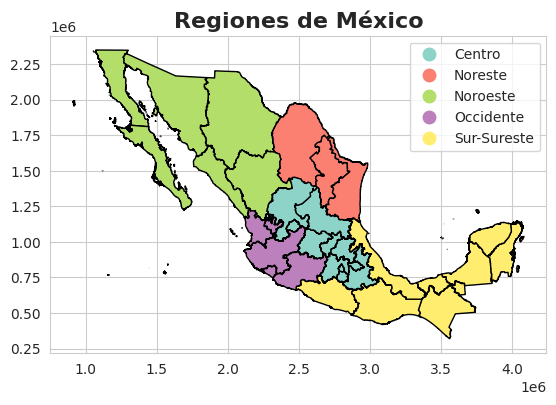

In [119]:
# Verificación
plt.figure(figsize=(5,5))
gdf_estados.plot(column='Region',categorical=True,legend=True,cmap='Set3',edgecolor='black')
plt.title('Regiones de México',fontsize=16,fontweight='bold')
plt.show()

In [120]:
df_clean[['latitud','longitud']]

,latitud,longitud
0,21.995503,-102.750478
1,21.773878,-102.300881
2,21.785075,-102.319444
3,22.224067,-102.336411
4,22.041083,-101.973917
...,...,...
71084,22.097433,-103.134486
71085,22.765983,-104.225019
71086,21.173661,-103.542964
71087,22.781378,-102.580433


## 2. Visualizaciones

### 2.1 Número de incendios por año

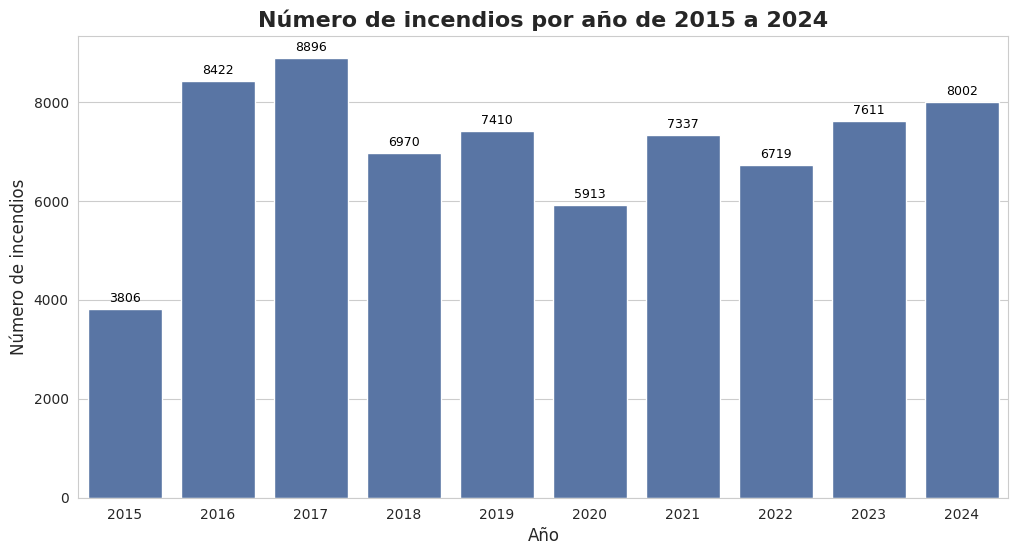

In [93]:
sns.set_style('whitegrid')
sns.set_palette('deep')
plt.figure(figsize=(12,6))
ax = sns.countplot(
    x='anio',
    data=df_clean,
)
for container in ax.containers:
    ax.bar_label(container,padding=3,fontsize=9,color='black')

plt.xlabel('Año',fontsize=12)
plt.ylabel('Número de incendios',fontsize=12)
plt.title('Número de incendios por año de 2015 a 2024',fontsize=16,fontweight='bold')
plt.show()

### 2.2 Treemap de Incendios por Estación

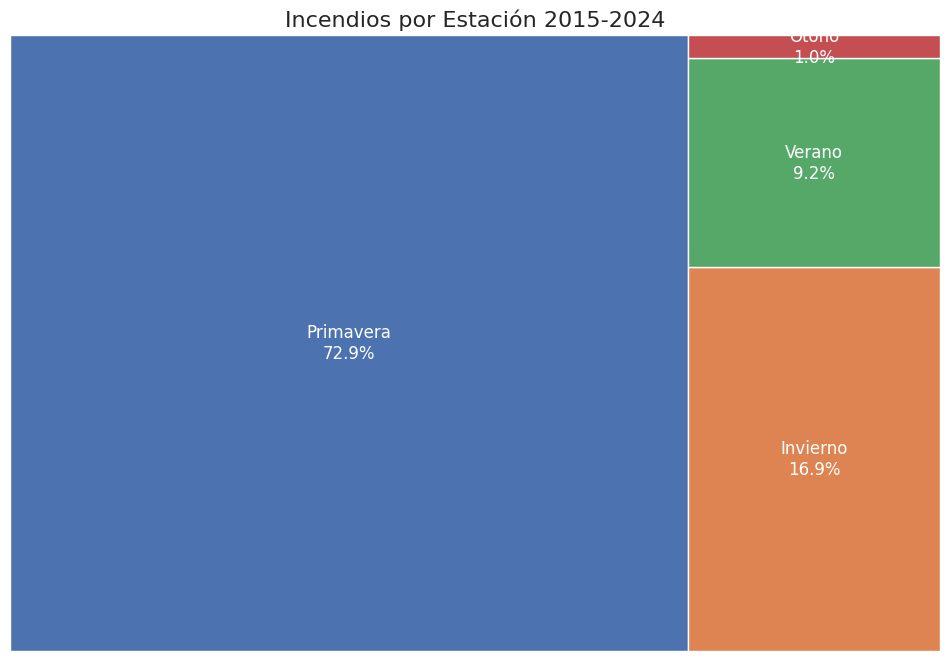

In [94]:
estacion = df_clean['estacion'].value_counts()
labels = [f"{i}\n{v/estacion.sum():.1%}" for i, v in zip(estacion.index, estacion.values)]
# Treemap
plt.figure(figsize=(12,8))
squarify.plot(
    sizes = estacion.values,
    label = labels,
    color=sns.color_palette('deep',n_colors=len(estacion)),
    text_kwargs={'fontsize':12,'color':'white'}
)
plt.title('Incendios por Estación 2015-2024',fontsize=16)
plt.axis('off')
plt.show()

### 2.3 Incendios por Mes (2015-2024)

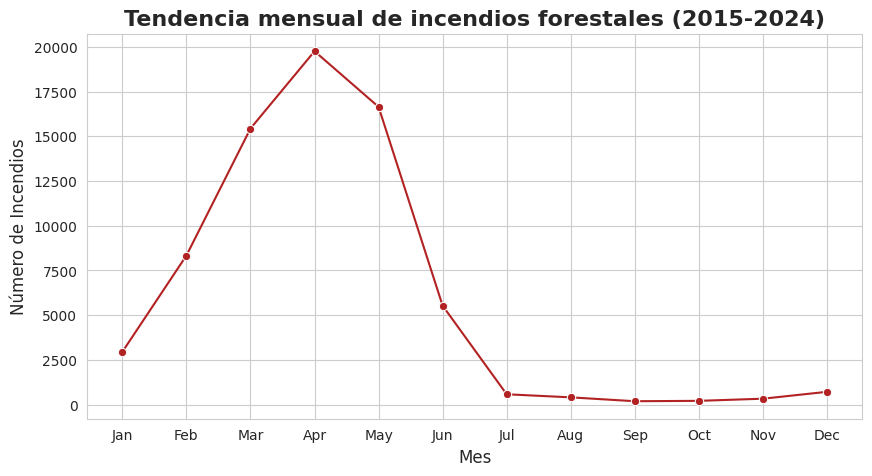

In [95]:
# Promedio mensual
promedio_mensual = (
    df_clean
    .groupby('mes_inicio')
    .size()
    .reindex(range(1,13),fill_value=0)
)

# Graficar
plt.figure(figsize=(10,5))
sns.lineplot(x=promedio_mensual.index,y=promedio_mensual.values,marker='o',color='firebrick')
plt.xticks(ticks=range(1,13),labels=[calendar.month_abbr[m] for m in range(1,13)])
plt.xlabel('Mes',fontsize=12)
plt.ylabel('Número de Incendios',fontsize=12)
plt.title('Tendencia mensual de incendios forestales (2015-2024)',fontsize=16,fontweight='bold')
plt.grid(True)
plt.show()

### 2.3 Incedios Mensuales por Año (2015-2024)

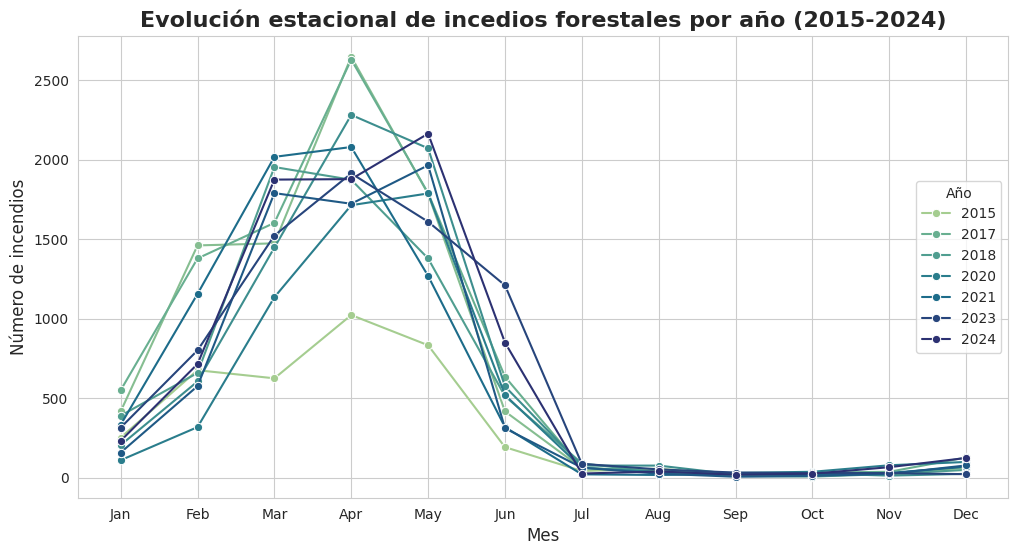

In [96]:
conteo_anual = (
    df_clean
    .groupby(['anio_inicio','mes_inicio'])
    .size()
    .reset_index(name='conteo')
)
plt.figure(figsize=(12,6))
sns.lineplot(
    data=conteo_anual,
    x='mes_inicio',
    y='conteo',
    hue='anio_inicio',
    palette='crest',
    marker='o'
)
plt.xticks(ticks=range(1,13),labels=[calendar.month_abbr[m] for m in range(1,13)])
plt.xlabel('Mes',fontsize=12)
plt.ylabel('Número de incendios',fontsize=12)
plt.title('Evolución estacional de incedios forestales por año (2015-2024)',fontsize=16
          ,fontweight='bold')
plt.legend(title='Año',loc='center right')
plt.show()

### 2.4 Incedios por Causa

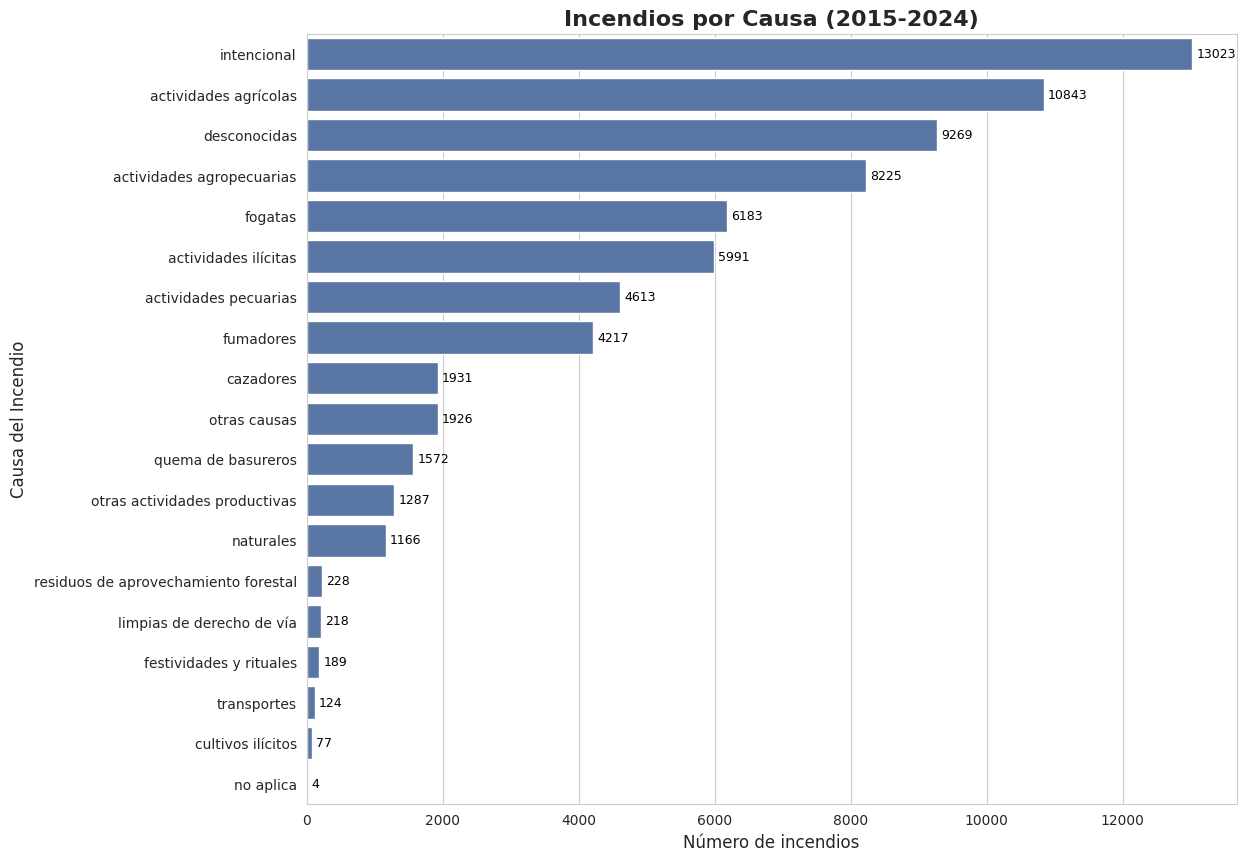

In [97]:
plt.figure(figsize=(12,10))
ax = sns.countplot(
    y='Causa',
    data=df_clean,order=df_clean['Causa'].value_counts().index,
)
for container in ax.containers:
    ax.bar_label(container,padding=3,fontsize=9,color='black')

plt.xlabel('Número de incendios',fontsize=12)
plt.ylabel('Causa del Incendio',fontsize=12)
plt.title('Incendios por Causa (2015-2024)',fontsize=16,fontweight='bold')
plt.show()

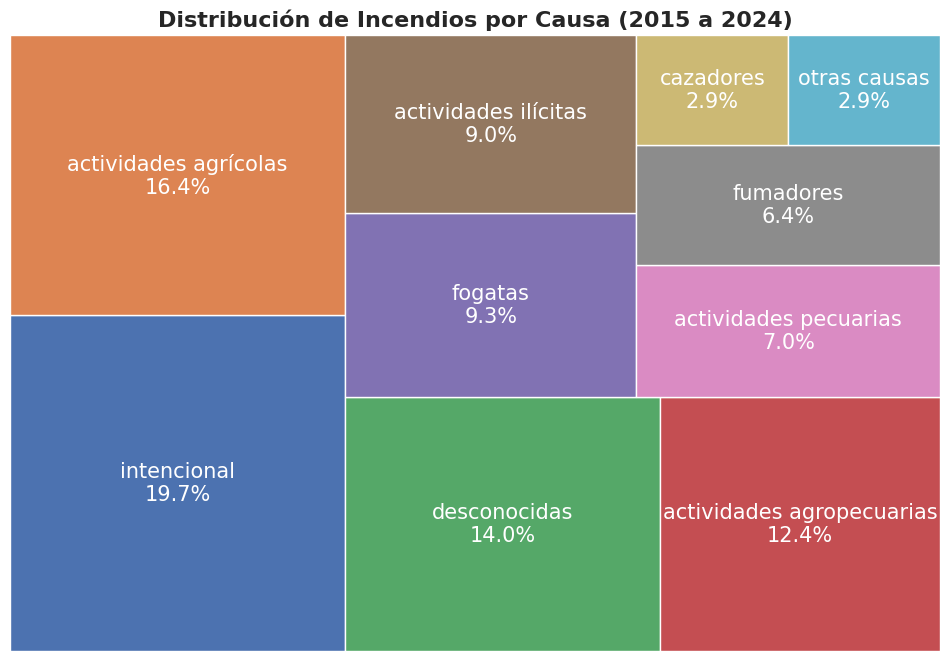

In [98]:
causas = df_clean['Causa'].value_counts().head(10)
labels = [f"{i}\n{v/causas.sum():.1%}" for i, v in zip(causas.index, causas.values)]
# Treemap
plt.figure(figsize=(12,8))
squarify.plot(
    sizes = causas.values,
    label = labels,
    color=sns.color_palette('deep',n_colors=len(causas)),
    text_kwargs={'fontsize':15,'color':'white'}
)
plt.title('Distribución de Incendios por Causa (2015 a 2024)',fontsize=16,fontweight='bold')
plt.axis('off')
plt.show()

### 2.5 Concentración de incendios por mes y año

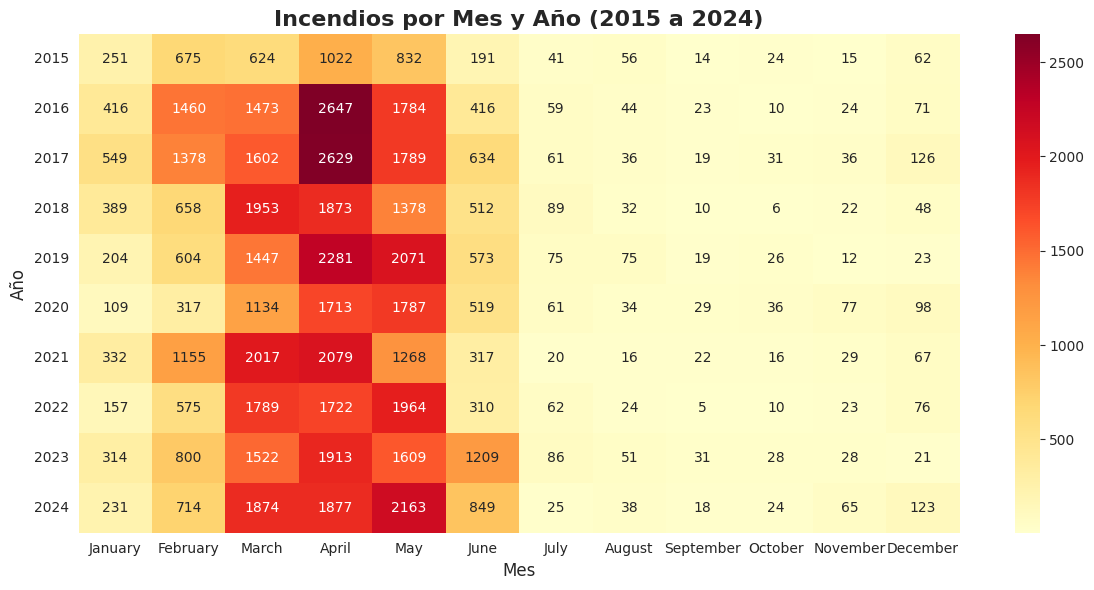

In [99]:
import calendar
tabla = df_clean.pivot_table(
    index='anio_inicio',
    columns='mes_inicio',
    values = 'Causa',
    aggfunc='count',
    fill_value=0
)
tabla.columns = [calendar.month_name[i] for i in tabla.columns]
plt.figure(figsize=(12,6))
sns.heatmap(
    tabla,
    cmap='YlOrRd',
    annot=True,
    fmt='g'
)
plt.title('Incendios por Mes y Año (2015 a 2024)',fontsize=16,fontweight='bold')
plt.xlabel('Mes',fontsize=12)
plt.ylabel('Año',fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 2.5 Distribución espacial de los incendios